In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../Data/superstore_data.csv')

# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


Dataset shape: (2240, 22)

First few rows:
      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDeals

In [189]:
print("\nDataset info:")
print(df.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    22

In [190]:
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.

In [191]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [192]:
# Handle missing values
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])



Missing values in each column:
Income    24
dtype: int64


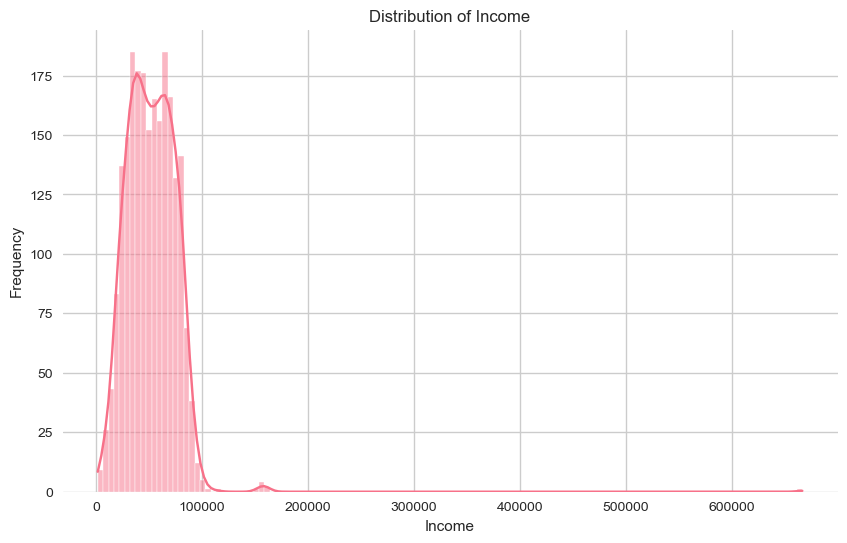

In [193]:
# For this dataset, we'll focus on the Income column which has missing values
# Let's check the distribution of Income to decide on imputation strategy
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'].dropna(), kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



In [194]:
# Since Income is right-skewed, we'll use median imputation
df['Income'] = df['Income'].fillna(df['Income'].median())

# Check if any missing values remain
print("Remaining missing values after imputation:")
print(df.isnull().sum().sum())



Remaining missing values after imputation:
0


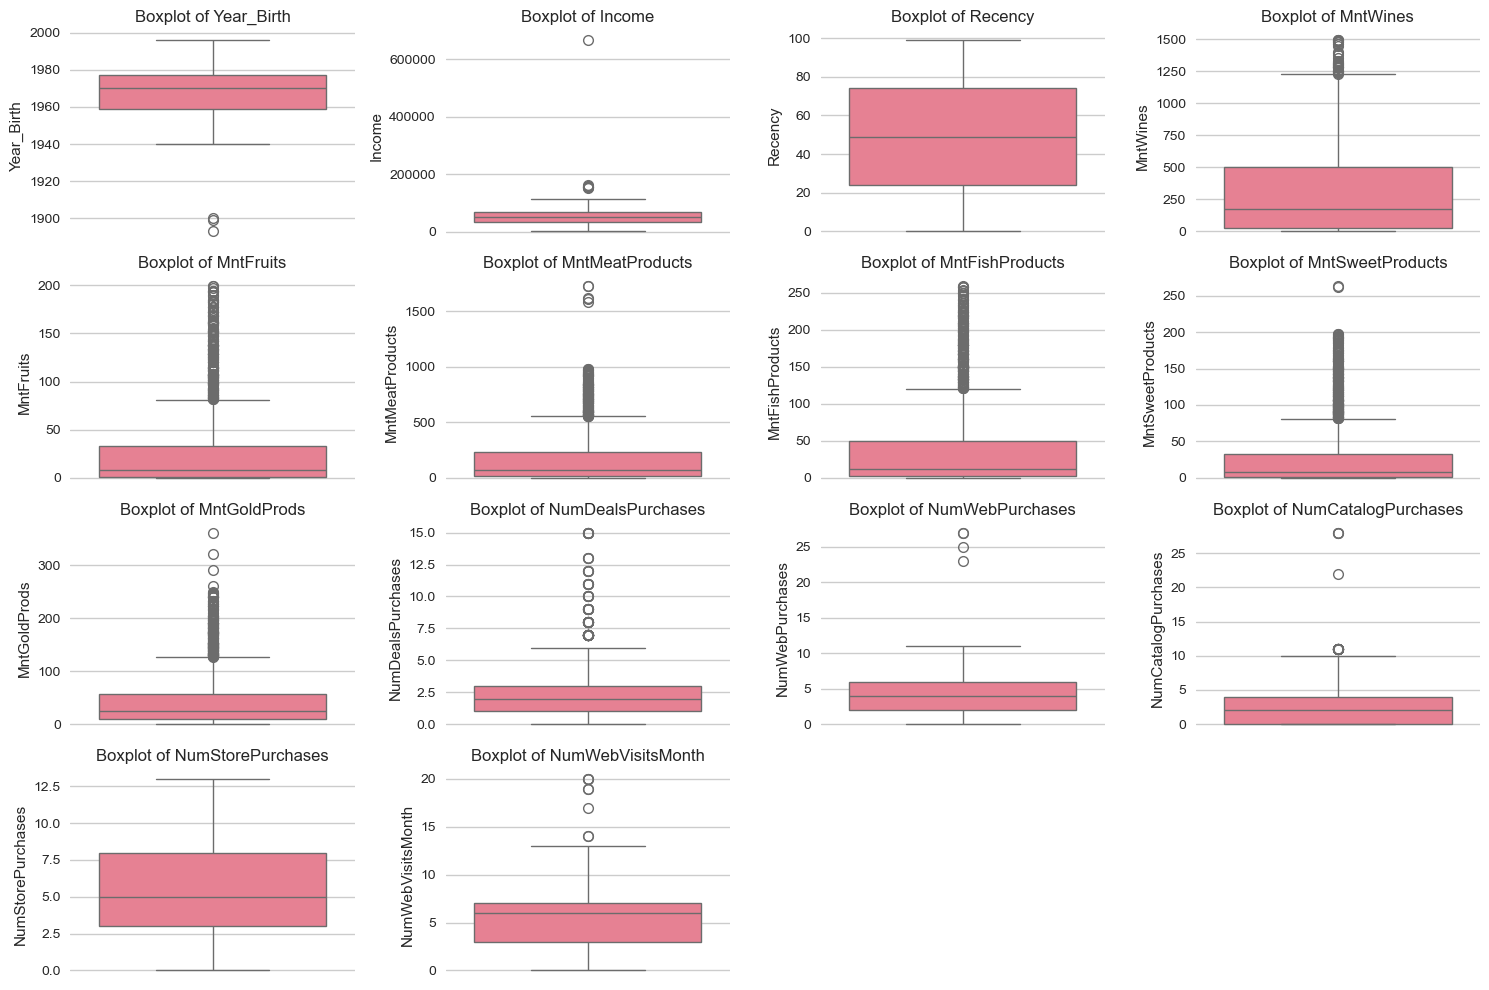

In [195]:
# Outlier detection for numerical columns
numerical_cols = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



In [196]:
# Data transformation - encode categorical variables
categorical_cols = ['Education', 'Marital_Status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [197]:
# Create new features
# Calculate total spending
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                       df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Calculate total purchases
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calculate average purchase value
df['Avg_Purchase_Value'] = df['Total_Spending'] / df['Total_Purchases'].replace(0, 1)

# Convert Dt_Customer to datetime and extract features
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Seniority'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days
df['Enrollment_Year'] = df['Dt_Customer'].dt.year
df['Enrollment_Month'] = df['Dt_Customer'].dt.month

print("New features created successfully!")

New features created successfully!


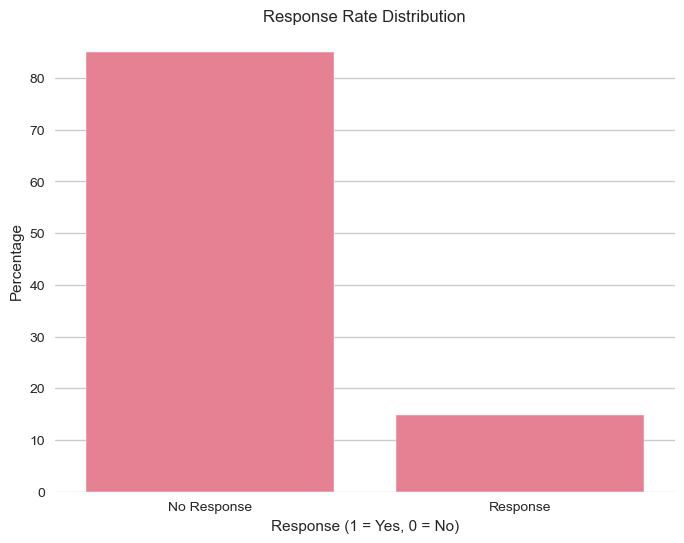

Overall response rate: 14.91%


In [198]:
# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Response rate analysis
response_rate = df['Response'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=response_rate.index, y=response_rate.values)
plt.title('Response Rate Distribution')
plt.xlabel('Response (1 = Yes, 0 = No)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No Response', 'Response'])
plt.show()

print(f"Overall response rate: {response_rate[1]:.2f}%")



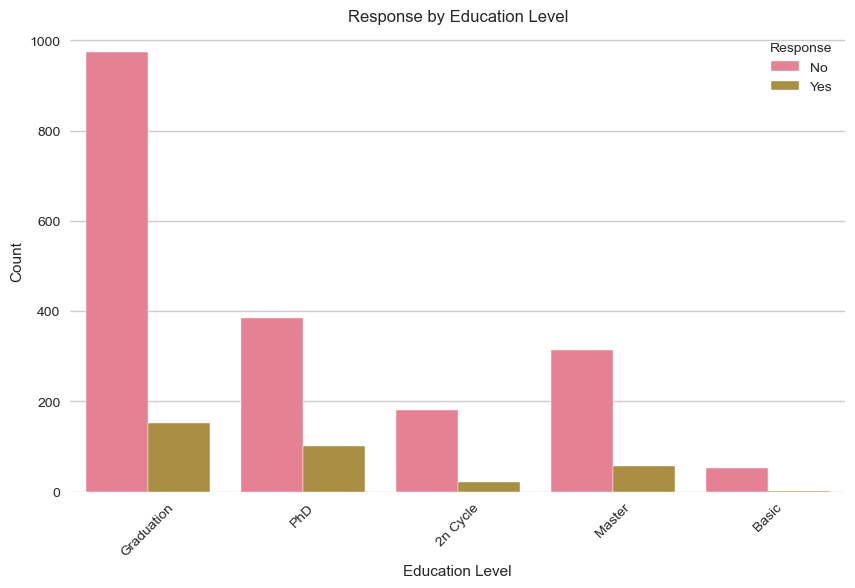

In [199]:
# 2. Response by education level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Response')
plt.title('Response by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()



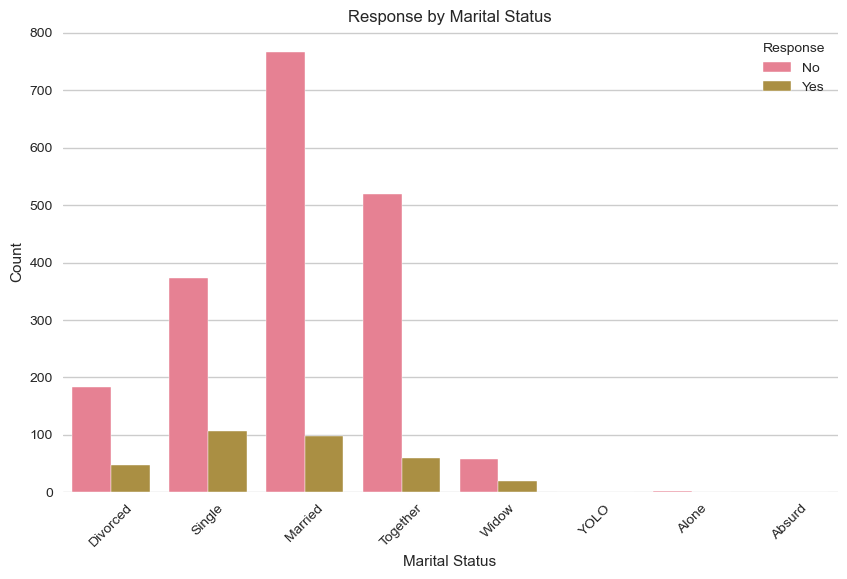

In [200]:
# 3. Response by marital status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', hue='Response')
plt.title('Response by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()



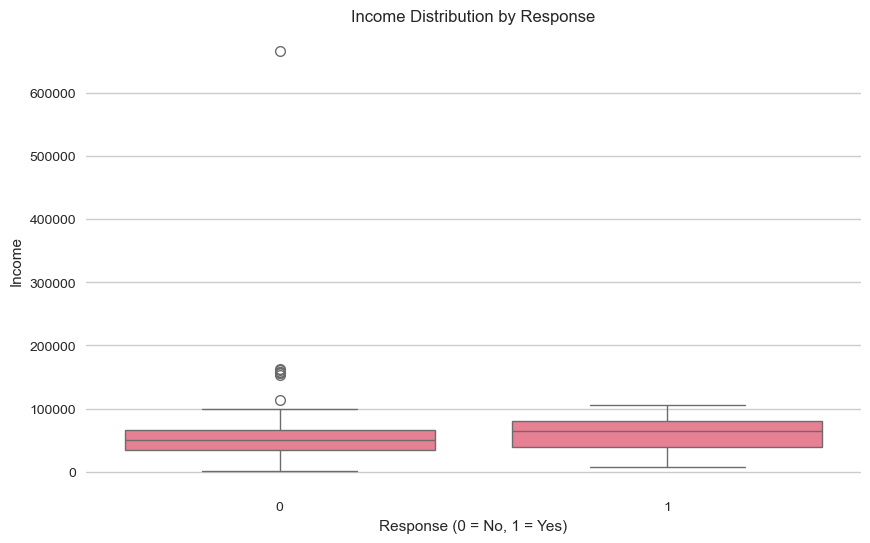

In [201]:
# 4. Income distribution by response
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Response', y='Income')
plt.title('Income Distribution by Response')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()



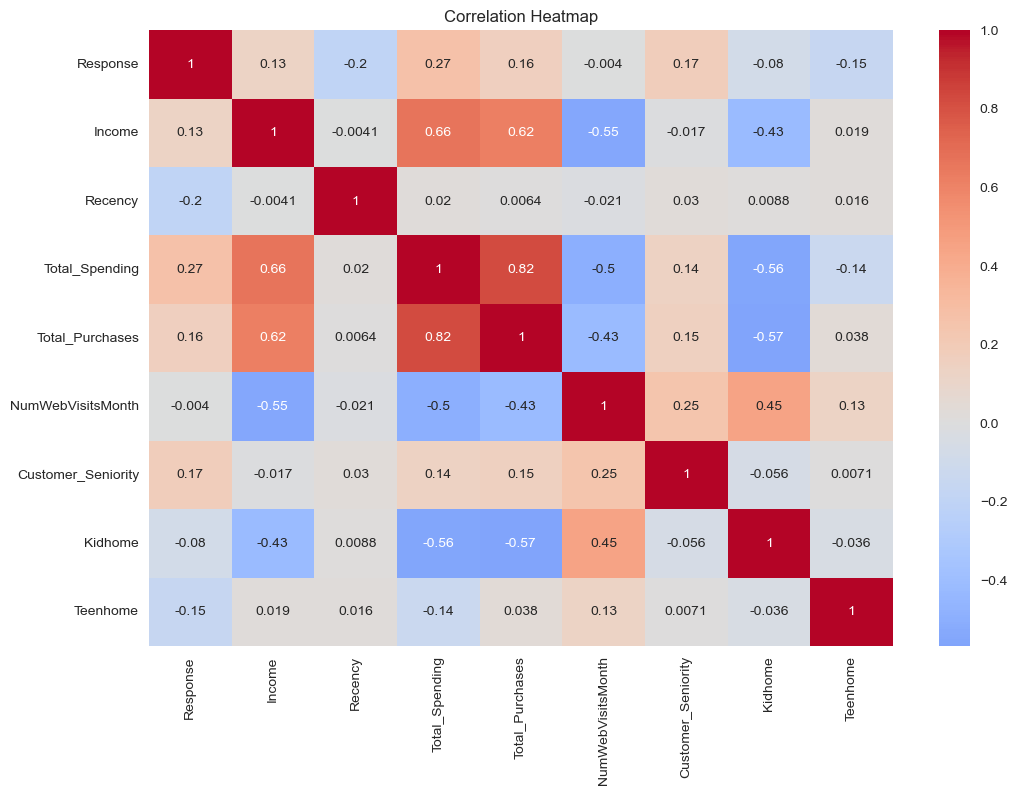

In [202]:
# 5. Correlation heatmap
correlation_cols = ['Response', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases', 
                    'NumWebVisitsMonth', 'Customer_Seniority', 'Kidhome', 'Teenhome']

plt.figure(figsize=(12, 8))
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



<Figure size 1200x800 with 0 Axes>

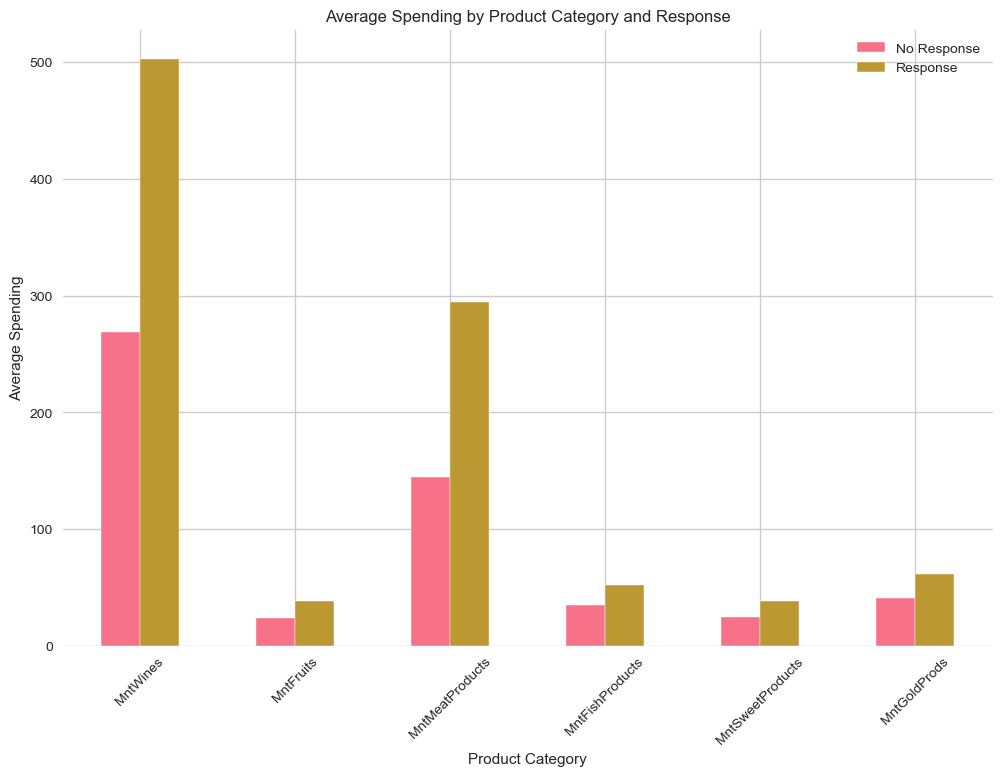

In [203]:
# 6. Spending patterns by response
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds']

# Calculate average spending by response category
avg_spending = df.groupby('Response')[spending_cols].mean().T

plt.figure(figsize=(12, 8))
avg_spending.plot(kind='bar')
plt.title('Average Spending by Product Category and Response')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.legend(['No Response', 'Response'])
plt.xticks(rotation=45)
plt.show()



<Figure size 1000x600 with 0 Axes>

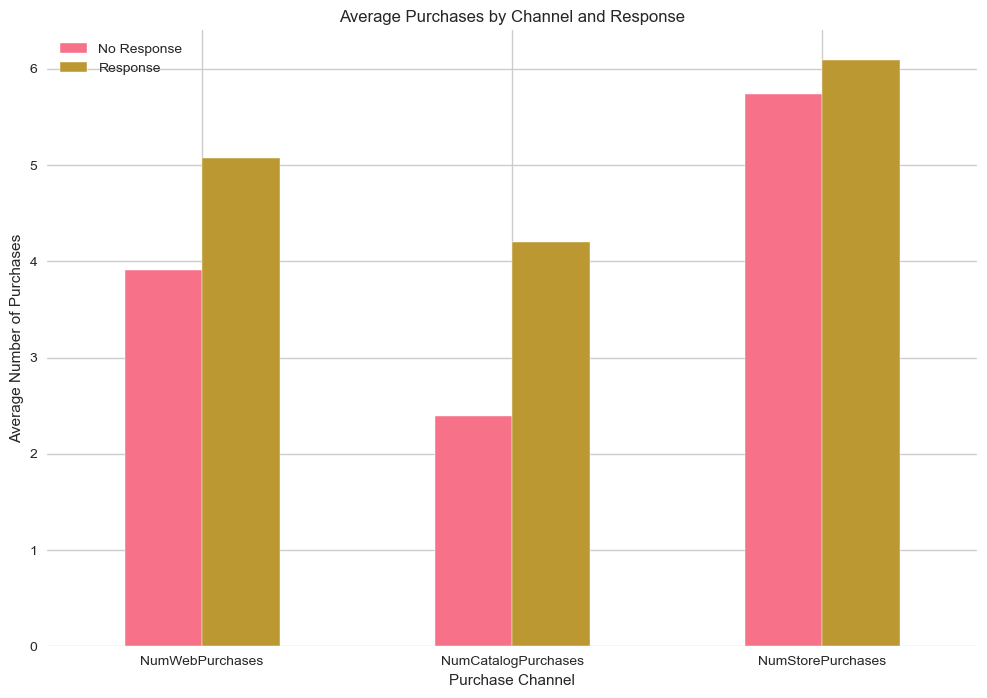

In [204]:
# 7. Purchase channels by response
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calculate average purchases by channel and response
avg_purchases = df.groupby('Response')[purchase_channels].mean().T

plt.figure(figsize=(10, 6))
avg_purchases.plot(kind='bar')
plt.title('Average Purchases by Channel and Response')
plt.xlabel('Purchase Channel')
plt.ylabel('Average Number of Purchases')
plt.legend(['No Response', 'Response'])
plt.xticks(rotation=0)
plt.show()



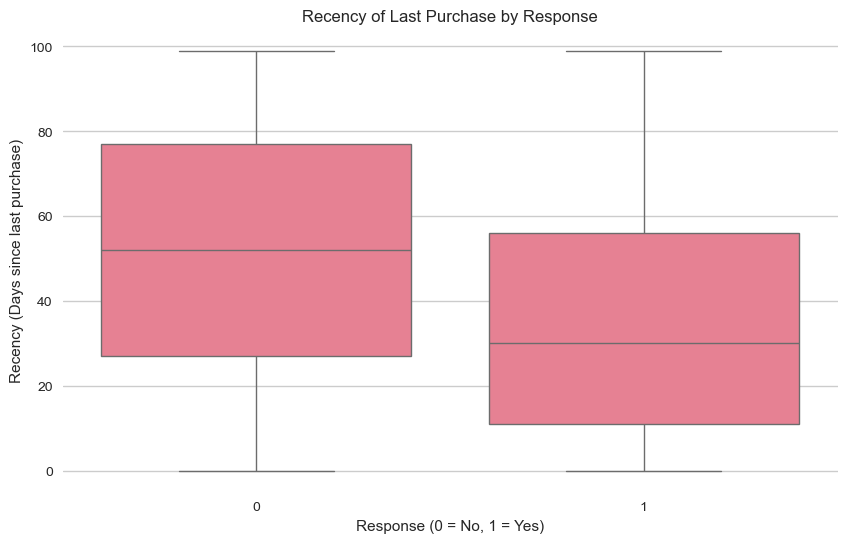

In [205]:
# 8. Recency vs Response
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Response', y='Recency')
plt.title('Recency of Last Purchase by Response')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Recency (Days since last purchase)')
plt.show()



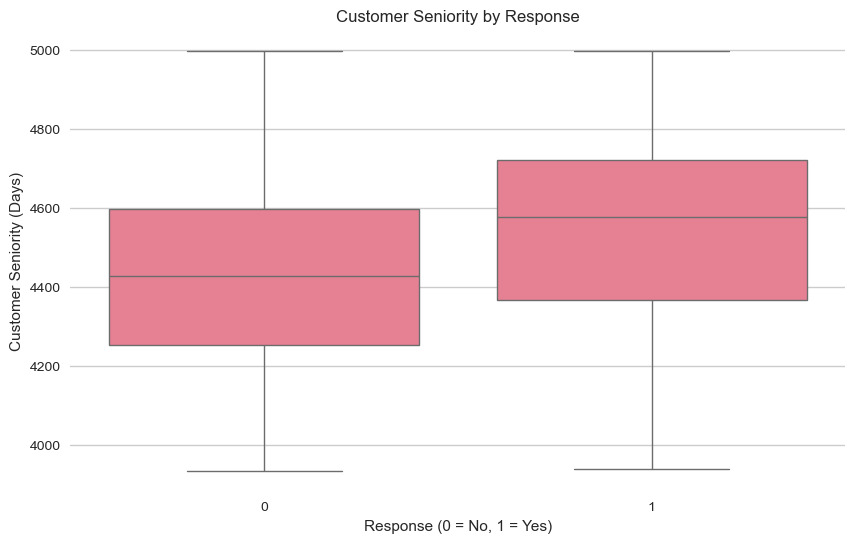

In [206]:
# 9. Customer seniority vs response
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Response', y='Customer_Seniority')
plt.title('Customer Seniority by Response')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Customer Seniority (Days)')
plt.show()



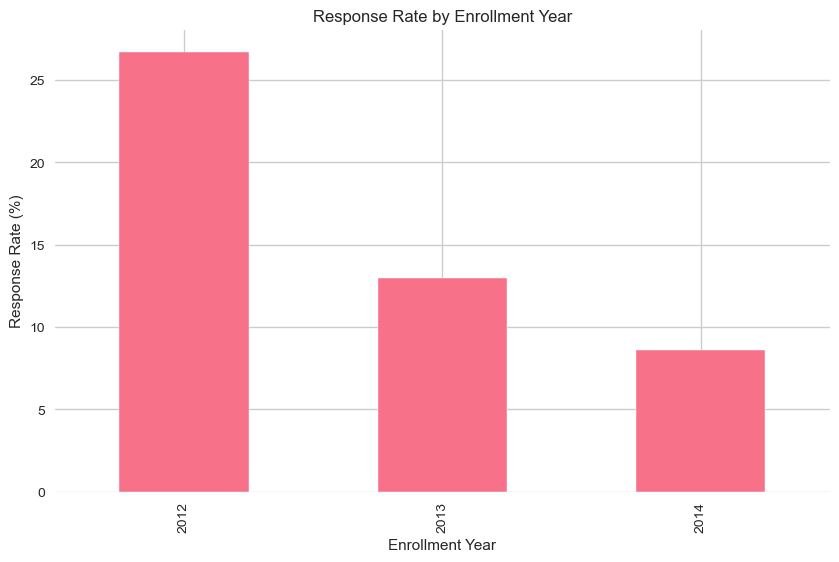

In [207]:
# 10. Response rate by enrollment year
response_by_year = df.groupby('Enrollment_Year')['Response'].mean() * 100
plt.figure(figsize=(10, 6))
response_by_year.plot(kind='bar')
plt.title('Response Rate by Enrollment Year')
plt.xlabel('Enrollment Year')
plt.ylabel('Response Rate (%)')
plt.show()



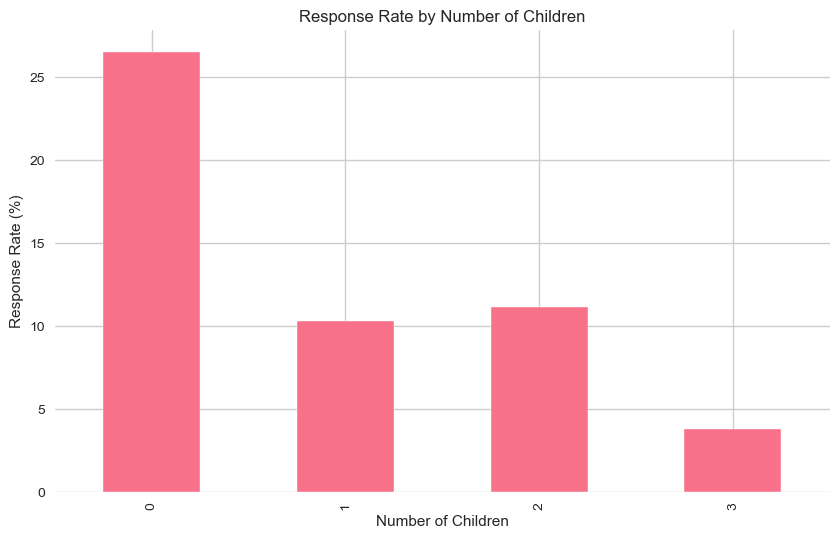

In [208]:
# 11. Response rate by number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
response_by_children = df.groupby('Total_Children')['Response'].mean() * 100
plt.figure(figsize=(10, 6))
response_by_children.plot(kind='bar')
plt.title('Response Rate by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Response Rate (%)')
plt.show()

In [209]:
# Calculate key metrics
print("KEY INSIGHTS SUMMARY")
print("=" * 50)

# Overall response rate
overall_response = df['Response'].mean() * 100
print(f"1. Overall campaign response rate: {overall_response:.2f}%")

# Response by education
edu_response = df.groupby('Education')['Response'].mean() * 100
print("\n2. Response rate by education:")
for edu, rate in edu_response.items():
    print(f"   - {edu}: {rate:.2f}%")

# Response by marital status
marital_response = df.groupby('Marital_Status')['Response'].mean() * 100
print("\n3. Response rate by marital status:")
for status, rate in marital_response.items():
    print(f"   - {status}: {rate:.2f}%")

# Income difference between responders and non-responders
income_response = df.groupby('Response')['Income'].mean()
print(f"\n4. Average income:")
print(f"   - Responders: ${income_response[1]:.2f}")
print(f"   - Non-responders: ${income_response[0]:.2f}")
print(f"   - Difference: ${income_response[1] - income_response[0]:.2f}")

# Spending difference
spending_response = df.groupby('Response')['Total_Spending'].mean()
print(f"\n5. Average total spending:")
print(f"   - Responders: ${spending_response[1]:.2f}")
print(f"   - Non-responders: ${spending_response[0]:.2f}")
print(f"   - Difference: ${spending_response[1] - spending_response[0]:.2f}")

# Most effective purchase channel
channel_response = df.groupby('Response')[purchase_channels].mean()
channel_difference = channel_response.loc[1] - channel_response.loc[0]
most_effective_channel = channel_difference.idxmax()
print(f"\n6. Most effective purchase channel for responders: {most_effective_channel}")

# Correlation with response
corr_with_response = corr_matrix['Response'].sort_values(ascending=False)
print("\n7. Features most correlated with response:")
for feature, correlation in corr_with_response.items():
    if feature != 'Response':
        print(f"   - {feature}: {correlation:.3f}")

# Recommendations
print("\n8. MARKETING RECOMMENDATIONS:")
print("   - Focus on customers with higher income levels")
print("   - Target customers with PhD and Master education levels")
print("   - Engage customers who have recently made purchases")
print("   - Encourage catalog purchases as they show highest correlation with response")
print("   - Consider family status (number of children) in targeting strategies")
print("   - Leverage customers with longer tenure for better response rates")

KEY INSIGHTS SUMMARY
1. Overall campaign response rate: 14.91%

2. Response rate by education:
   - 2n Cycle: 10.84%
   - Basic: 3.70%
   - Graduation: 13.49%
   - Master: 15.41%
   - PhD: 20.78%

3. Response rate by marital status:
   - Absurd: 50.00%
   - Alone: 33.33%
   - Divorced: 20.69%
   - Married: 11.34%
   - Single: 22.08%
   - Together: 10.34%
   - Widow: 24.68%
   - YOLO: 50.00%

4. Average income:
   - Responders: $60183.24
   - Non-responders: $50845.68
   - Difference: $9337.57

5. Average total spending:
   - Responders: $987.39
   - Non-responders: $538.93
   - Difference: $448.46

6. Most effective purchase channel for responders: NumCatalogPurchases

7. Features most correlated with response:
   - Total_Spending: 0.265
   - Customer_Seniority: 0.174
   - Total_Purchases: 0.165
   - Income: 0.133
   - NumWebVisitsMonth: -0.004
   - Kidhome: -0.080
   - Teenhome: -0.154
   - Recency: -0.198

8. MARKETING RECOMMENDATIONS:
   - Focus on customers with higher income level